In [1]:
# Tarefa Proggeo: Fazer alguns testes com o Xarray

Referência: https://xarray-contrib.github.io/xarray-tutorial/oceanhackweek-2020/xarray-oceanhackweek20.html

In [2]:
# Importar as bibiotecas

import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

import datetime

%matplotlib inline

In [3]:
# Caregar o s dados

ds = xr.tutorial.load_dataset("air_temperature")

**O que é o conjunto de dados?**

Resposta: muitos DataArrays

In [4]:
# Exibir o dataset

ds

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 243.5 ... 296.5 296.2 295.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [5]:
# pull out "air" dataarray with dictionary syntax

ds["air"]

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
array([[[241.2    , 242.5    , 243.5    , ..., 232.79999, 235.5    ,
         238.59999],
        [243.79999, 244.5    , 244.7    , ..., 232.79999, 235.29999,
         239.29999],
        [250.     , 249.79999, 248.89   , ..., 233.2    , 236.39   ,
         241.7    ],
        ...,
        [296.6    , 296.19998, 296.4    , ..., 295.4    , 295.1    ,
         294.69998],
        [295.9    , 296.19998, 296.79   , ..., 295.9    , 295.9    ,
         295.19998],
        [296.29   , 296.79   , 297.1    , ..., 296.9    , 296.79   ,
         296.6    ]],

       [[242.09999, 242.7    , 243.09999, ..., 232.     , 233.59999,
         235.79999],
        [243.59999, 244.09999, 244.2    , ..., 231.     , 232.5    ,
         235.7    ],
        [253.2    , 252.89   , 252.09999, ..., 230.79999, 233.39   ,
         238.5    ],
...
        [293.69   , 293.88998, 295.38998, ..., 295.09   , 294.69   ,
         294.29   ],
        [296.29   , 297.19   , 297.59   , ..., 295.29   , 295.09   ,
         294.38998],
        [297.79   , 298.38998, 298.49   , ..., 295.69   , 295.49   ,
         295.19   ]],

       [[245.09   , 244.29   , 243.29   , ..., 241.68999, 241.48999,
         241.79   ],
        [249.89   , 249.29   , 248.39   , ..., 239.59   , 240.29   ,
         241.68999],
        [262.99   , 262.19   , 261.38998, ..., 239.89   , 242.59   ,
         246.29   ],
        ...,
        [293.79   , 293.69   , 295.09   , ..., 295.29   , 295.09   ,
         294.69   ],
        [296.09   , 296.88998, 297.19   , ..., 295.69   , 295.69   ,
         295.19   ],
        [297.69   , 298.09   , 298.09   , ..., 296.49   , 296.19   ,
         295.69   ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [6]:
# Acessar as latitudes

ds["lat"]

<xarray.DataArray 'lat' (lat: 25)>
array([75. , 72.5, 70. , 67.5, 65. , 62.5, 60. , 57.5, 55. , 52.5, 50. , 47.5,
       45. , 42.5, 40. , 37.5, 35. , 32.5, 30. , 27.5, 25. , 22.5, 20. , 17.5,
       15. ], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
Attributes:
    standard_name:  latitude
    long_name:      Latitude
    units:          degrees_north
    axis:           Y

**O que há em um DataArray?**

Resposta: Dados + muitos metadados

In [7]:
# Dimensões nomeadas .dims

ds['air'].dims

('time', 'lat', 'lon')

#### Variáveis de coordenadas ou “rótulos de escala” ( .coords)

In [8]:
# .coords é um contêiner de dados simples para variáveis ​​de coordenadas.

In [9]:
ds['air'].coords

Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00

#### Objetos de coordenadas suportam notação de indexação semelhante

In [10]:
# extracting coorindate variables from .coords
ds.coords["lon"]

<xarray.DataArray 'lon' (lon: 53)>
array([200. , 202.5, 205. , 207.5, 210. , 212.5, 215. , 217.5, 220. , 222.5,
       225. , 227.5, 230. , 232.5, 235. , 237.5, 240. , 242.5, 245. , 247.5,
       250. , 252.5, 255. , 257.5, 260. , 262.5, 265. , 267.5, 270. , 272.5,
       275. , 277.5, 280. , 282.5, 285. , 287.5, 290. , 292.5, 295. , 297.5,
       300. , 302.5, 305. , 307.5, 310. , 312.5, 315. , 317.5, 320. , 322.5,
       325. , 327.5, 330. ], dtype=float32)
Coordinates:
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
Attributes:
    standard_name:  longitude
    long_name:      Longitude
    units:          degrees_east
    axis:           X

#### Atributos arbitrários ( .attrs)

.attrsé um dicionário que pode conter objetos Python arbitrários.
Sua única limitação é que alguns atributos podem não ser graváveis ​​em um arquivo netCDF

In [11]:
ds['air'].attrs

{'long_name': '4xDaily Air temperature at sigma level 995',
 'units': 'degK',
 'precision': 2,
 'GRIB_id': 11,
 'GRIB_name': 'TMP',
 'var_desc': 'Air temperature',
 'dataset': 'NMC Reanalysis',
 'level_desc': 'Surface',
 'statistic': 'Individual Obs',
 'parent_stat': 'Other',
 'actual_range': array([185.16, 322.1 ], dtype=float32)}

In [12]:
# Criação de um novo atributo

ds.air.attrs["who_is_awesome"] = "xarray"
ds.air.attrs

{'long_name': '4xDaily Air temperature at sigma level 995',
 'units': 'degK',
 'precision': 2,
 'GRIB_id': 11,
 'GRIB_name': 'TMP',
 'var_desc': 'Air temperature',
 'dataset': 'NMC Reanalysis',
 'level_desc': 'Surface',
 'statistic': 'Individual Obs',
 'parent_stat': 'Other',
 'actual_range': array([185.16, 322.1 ], dtype=float32),
 'who_is_awesome': 'xarray'}

#### Dados subjacentes ( .data)


As estruturas Xarray envolvem estruturas de dados mais simples subjacentes. Nesse caso, os dados subjacentes são uma matriz numpy com a qual você pode estar familiarizado.

Esta parte do xarray é bastante extensível, permitindo arrays de GPU, arrays esparsos, arrays com unidades, etc. Veja a demonstração no final.

In [13]:
ds['air'].data

array([[[241.2    , 242.5    , 243.5    , ..., 232.79999, 235.5    ,
         238.59999],
        [243.79999, 244.5    , 244.7    , ..., 232.79999, 235.29999,
         239.29999],
        [250.     , 249.79999, 248.89   , ..., 233.2    , 236.39   ,
         241.7    ],
        ...,
        [296.6    , 296.19998, 296.4    , ..., 295.4    , 295.1    ,
         294.69998],
        [295.9    , 296.19998, 296.79   , ..., 295.9    , 295.9    ,
         295.19998],
        [296.29   , 296.79   , 297.1    , ..., 296.9    , 296.79   ,
         296.6    ]],

       [[242.09999, 242.7    , 243.09999, ..., 232.     , 233.59999,
         235.79999],
        [243.59999, 244.09999, 244.2    , ..., 231.     , 232.5    ,
         235.7    ],
        [253.2    , 252.89   , 252.09999, ..., 230.79999, 233.39   ,
         238.5    ],
        ...,
        [296.4    , 295.9    , 296.19998, ..., 295.4    , 295.1    ,
         294.79   ],
        [296.19998, 296.69998, 296.79   , ..., 295.6    , 295.5    ,
   

In [14]:
x = ds['air'].data

In [15]:
x.shape

(2920, 25, 53)

In [16]:
# Verificar o tipo (é uma matriz numpy)

type(ds.air.data)

numpy.ndarray

#### Análise

Xarray fornece duas estruturas de dados principais

**DataArrays** que envolvem recipientes de dados subjacentes (por exemplo, matrizes numpy) e contêm metadados associados

Conjuntos de dados que são contêineres do tipo **dict** de DataArrays

# Análise sem xarray

<ipython-input-17-73a51972742a>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(lon, lat, temp[0, :, :])


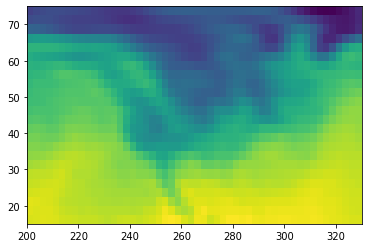

In [17]:
# plot the first timestep
lat = ds['air'].lat.data  # numpy array
lon = ds['air'].lon.data  # numpy array
temp = ds['air'].data  # numpy array
plt.figure()
plt.pcolormesh(lon, lat, temp[0, :, :])

In [18]:
temp.mean(axis=1)  ## what did I just do? I can't tell by looking at this line.

array([[279.39798, 279.6664 , 279.66122, ..., 279.9508 , 280.31522,
        280.6624 ],
       [279.05722, 279.538  , 279.7296 , ..., 279.77563, 280.27002,
        280.79764],
       [279.0104 , 279.2808 , 279.5508 , ..., 279.682  , 280.19763,
        280.81403],
       ...,
       [279.63   , 279.934  , 280.534  , ..., 279.802  , 280.346  ,
        280.77798],
       [279.398  , 279.66602, 280.31796, ..., 279.766  , 280.34198,
        280.834  ],
       [279.27   , 279.354  , 279.88202, ..., 279.42596, 279.96997,
        280.48196]], dtype=float32)

# Análise com xarray 

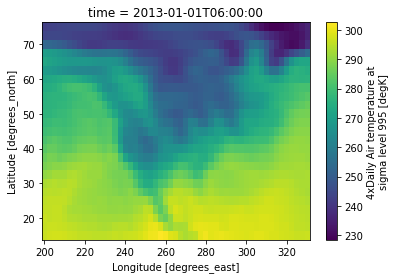

In [19]:
ds['air'].isel(time=1).plot(x="lon")

## Use nomes de dimensão em vez de números de eixo

In [20]:
ds['air'].mean("time")

<xarray.DataArray 'air' (lat: 25, lon: 53)>
array([[260.37564, 260.1826 , 259.88593, ..., 250.81511, 251.93733,
        253.43741],
       [262.7337 , 262.7936 , 262.7489 , ..., 249.75496, 251.5852 ,
        254.35849],
       [264.7681 , 264.3271 , 264.0614 , ..., 250.60707, 253.58247,
        257.71475],
       ...,
       [297.64932, 296.95294, 296.62912, ..., 296.81033, 296.28793,
        295.81622],
       [298.1287 , 297.93646, 297.47006, ..., 296.8591 , 296.77686,
        296.44348],
       [298.36594, 298.38593, 298.11386, ..., 297.33777, 297.28104,
        297.30502]], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0

In [21]:
ds['air'].mean("lat")

<xarray.DataArray 'air' (time: 2920, lon: 53)>
array([[279.39798, 279.6664 , 279.66122, ..., 279.9508 , 280.31522,
        280.6624 ],
       [279.05722, 279.538  , 279.7296 , ..., 279.77563, 280.27002,
        280.79764],
       [279.0104 , 279.2808 , 279.5508 , ..., 279.682  , 280.19763,
        280.81403],
       ...,
       [279.63   , 279.934  , 280.534  , ..., 279.802  , 280.346  ,
        280.77798],
       [279.398  , 279.66602, 280.31796, ..., 279.766  , 280.34198,
        280.834  ],
       [279.27   , 279.354  , 279.88202, ..., 279.42596, 279.96997,
        280.48196]], dtype=float32)
Coordinates:
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00

## Extração de dados ou “indexação”: .sel,.isel

Suporta Xarray

indexação baseada em rótulo usando .sel

indexação baseada em posição usando .isel

Indexação baseada em rótulo
O Xarray herda suas regras de indexação baseadas em rótulos dos pandas; isso significa um ótimo suporte para datas e horas!



# Observação:

### Como selecionar por uma data específica

In [22]:
ds.sel(time="2013-05")

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 124)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-05-01 ... 2013-05-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 259.2 259.3 259.1 ... 298.2 297.6 297.5
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [23]:
# Posso criar um novo ds_new com o resultado do filtro por data

ds_new = ds.sel(time="2013-05")

In [24]:
ds_new

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 124)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-05-01 ... 2013-05-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 259.2 259.3 259.1 ... 298.2 297.6 297.5
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [25]:
# Posso pegar por uma lista de datas tbm

ds.sel(time=slice("2013-05-14", "2013-07-14"))

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 248)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-05-14 ... 2013-07-14T18:00:00
Data variables:
    air      (time, lat, lon) float32 263.2 263.0 263.0 ... 297.7 297.6 298.0
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [26]:
# Selecionar os próximos por indexação

ds.sel(lon=240.2, method="nearest")

<xarray.Dataset>
Dimensions:  (lat: 25, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
    lon      float32 240.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat) float32 239.6 237.2 240.1 249.0 ... 294.8 296.9 298.4
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [27]:
# Selecionar os próximos por indexação (+ de um ponto)

ds.sel(lon=[240.125, 234], lat=[40.3, 50.3], method="nearest")

<xarray.Dataset>
Dimensions:  (lat: 2, lon: 2, time: 2920)
Coordinates:
  * lat      (lat) float32 40.0 50.0
  * lon      (lon) float32 240.0 235.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 268.1 283.0 265.5 ... 285.2 256.8 268.6
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

# Indexação baseada em posição
Isso é semelhante ao seu entorpecimento usual, mas com o poder de dimensões nomeadas!array[0, 2, 3]

In [28]:
# pull out time index 0 and lat index 0

ds.air.isel(time=0, lat=0)  #  much better than ds.air[0, 0, :]

<xarray.DataArray 'air' (lon: 53)>
array([241.2    , 242.5    , 243.5    , 244.     , 244.09999, 243.89   ,
       243.59999, 243.09999, 242.5    , 241.89   , 241.2    , 240.29999,
       239.5    , 238.79999, 238.5    , 238.7    , 239.59999, 241.     ,
       242.89   , 244.79999, 246.5    , 247.79999, 248.59999, 249.     ,
       249.09999, 249.09999, 249.     , 248.89   , 248.7    , 248.59999,
       248.39   , 248.29999, 248.29999, 248.59999, 249.     , 249.5    ,
       249.59999, 249.09999, 247.79999, 245.39   , 242.2    , 238.5    ,
       234.7    , 231.29999, 228.79999, 227.29999, 227.     , 227.5    ,
       228.79999, 230.59999, 232.79999, 235.5    , 238.59999],
      dtype=float32)
Coordinates:
    lat      float32 75.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
    time     datetime64[ns] 2013-01-01
Attributes:
    long_name:       4xDaily Air temperature at sigma level 995
    units:           degK
    precision:       2
    GRIB_id:         11
    GRIB_name:       TMP
    var_desc:        Air temperature
    dataset:         NMC Reanalysis
    level_desc:      Surface
    statistic:       Individual Obs
    parent_stat:     Other
    actual_range:    [185.16 322.1 ]
    who_is_awesome:  xarray

In [29]:
# demonstrate slicing

ds.air.isel(lat=slice(10))

<xarray.DataArray 'air' (time: 2920, lat: 10, lon: 53)>
array([[[241.2    , 242.5    , 243.5    , ..., 232.79999, 235.5    ,
         238.59999],
        [243.79999, 244.5    , 244.7    , ..., 232.79999, 235.29999,
         239.29999],
        [250.     , 249.79999, 248.89   , ..., 233.2    , 236.39   ,
         241.7    ],
        ...,
        [274.79   , 275.19998, 275.6    , ..., 277.19998, 277.     ,
         277.     ],
        [275.9    , 276.9    , 276.9    , ..., 280.9    , 280.5    ,
         279.69998],
        [276.69998, 277.4    , 277.69998, ..., 283.29   , 284.1    ,
         283.9    ]],

       [[242.09999, 242.7    , 243.09999, ..., 232.     , 233.59999,
         235.79999],
        [243.59999, 244.09999, 244.2    , ..., 231.     , 232.5    ,
         235.7    ],
        [253.2    , 252.89   , 252.09999, ..., 230.79999, 233.39   ,
         238.5    ],
...
        [275.59   , 276.29   , 277.49   , ..., 275.19   , 275.79   ,
         276.59   ],
        [276.88998, 277.88998, 278.69   , ..., 273.59   , 274.29   ,
         275.29   ],
        [276.79   , 277.29   , 278.29   , ..., 274.19   , 275.38998,
         276.88998]],

       [[245.09   , 244.29   , 243.29   , ..., 241.68999, 241.48999,
         241.79   ],
        [249.89   , 249.29   , 248.39   , ..., 239.59   , 240.29   ,
         241.68999],
        [262.99   , 262.19   , 261.38998, ..., 239.89   , 242.59   ,
         246.29   ],
        ...,
        [274.29   , 274.49   , 275.59   , ..., 274.69   , 274.99   ,
         275.38998],
        [276.79   , 277.49   , 277.99   , ..., 273.19   , 273.59   ,
         274.19   ],
        [276.88998, 277.29   , 277.59   , ..., 273.79   , 274.99   ,
         276.19   ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0 52.5
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:       4xDaily Air temperature at sigma level 995
    units:           degK
    precision:       2
    GRIB_id:         11
    GRIB_name:       TMP
    var_desc:        Air temperature
    dataset:         NMC Reanalysis
    level_desc:      Surface
    statistic:       Individual Obs
    parent_stat:     Other
    actual_range:    [185.16 322.1 ]
    who_is_awesome:  xarray

# CONVERSÃO

In [30]:
# convert to pandas dataframe
df = ds.isel(time=slice(10)).to_dataframe()
df

air
lat  lon   time                           
75.0 200.0 2013-01-01 00:00:00  241.199997
           2013-01-01 06:00:00  242.099991
           2013-01-01 12:00:00  242.299988
           2013-01-01 18:00:00  241.889999
           2013-01-02 00:00:00  243.199997
...                                    ...
15.0 330.0 2013-01-02 06:00:00  296.899994
           2013-01-02 12:00:00  297.100006
           2013-01-02 18:00:00  297.600006
           2013-01-03 00:00:00  297.000000
           2013-01-03 06:00:00  297.100006

[13250 rows x 1 columns]

In [31]:
df.shape

(13250, 1)

In [32]:
# convert dataframe to xarray

teste_ds = df.to_xarray()
teste_ds

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 10)
Coordinates:
  * lat      (lat) float64 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float64 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2013-01-03T06:00:00
Data variables:
    air      (lat, lon, time) float32 241.2 242.1 242.3 ... 297.6 297.0 297.1

# Converter um dataframe para Xarray

In [33]:
df = ds.isel().to_dataframe()
df

air
lat  lon   time                           
75.0 200.0 2013-01-01 00:00:00  241.199997
           2013-01-01 06:00:00  242.099991
           2013-01-01 12:00:00  242.299988
           2013-01-01 18:00:00  241.889999
           2013-01-02 00:00:00  243.199997
...                                    ...
15.0 330.0 2014-12-30 18:00:00  296.089996
           2014-12-31 00:00:00  295.489990
           2014-12-31 06:00:00  295.790009
           2014-12-31 12:00:00  295.190002
           2014-12-31 18:00:00  295.690002

[3869000 rows x 1 columns]

In [34]:
df_convertido = df.to_xarray()
df_convertido

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float64 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float64 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (lat, lon, time) float32 241.2 242.1 242.3 ... 295.8 295.2 295.7

# Exemplo de como fazer operações 

### Aqui a lat e lon representam as nossas bandas 

In [35]:
df_convertido.lat

<xarray.DataArray 'lat' (lat: 25)>
array([75. , 72.5, 70. , 67.5, 65. , 62.5, 60. , 57.5, 55. , 52.5, 50. , 47.5,
       45. , 42.5, 40. , 37.5, 35. , 32.5, 30. , 27.5, 25. , 22.5, 20. , 17.5,
       15. ])
Coordinates:
  * lat      (lat) float64 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0

In [36]:
df_convertido.time

<xarray.DataArray 'time' (time: 2920)>
array(['2013-01-01T00:00:00.000000000', '2013-01-01T06:00:00.000000000',
       '2013-01-01T12:00:00.000000000', ..., '2014-12-31T06:00:00.000000000',
       '2014-12-31T12:00:00.000000000', '2014-12-31T18:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00

In [37]:
# Exemplo de operação com o Xarray (lat e lon tem a mesma dimensão)

df_convertido.lat - df_convertido.lon

<xarray.DataArray (lat: 25, lon: 53)>
array([[-125. , -127.5, -130. , ..., -250. , -252.5, -255. ],
       [-127.5, -130. , -132.5, ..., -252.5, -255. , -257.5],
       [-130. , -132.5, -135. , ..., -255. , -257.5, -260. ],
       ...,
       [-180. , -182.5, -185. , ..., -305. , -307.5, -310. ],
       [-182.5, -185. , -187.5, ..., -307.5, -310. , -312.5],
       [-185. , -187.5, -190. , ..., -310. , -312.5, -315. ]])
Coordinates:
  * lat      (lat) float64 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float64 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0